In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Ecommerce Customers")
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg._Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

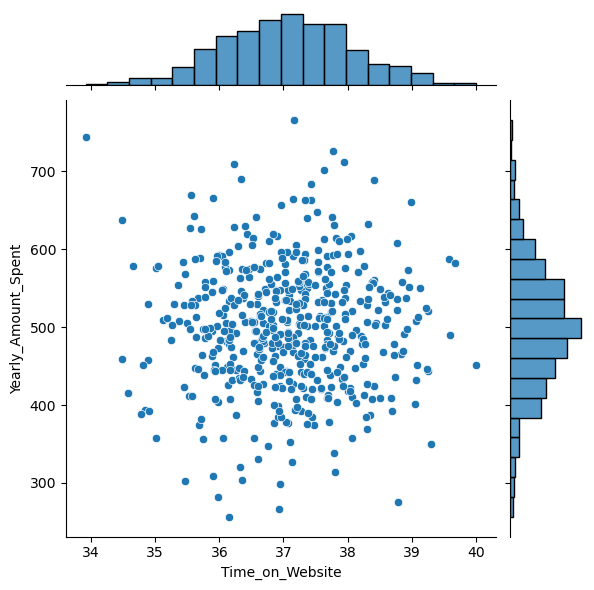

In [13]:
sns.jointplot(data = df, x = "Time_on_Website", y = "Yearly_Amount_Spent")
plt.show()

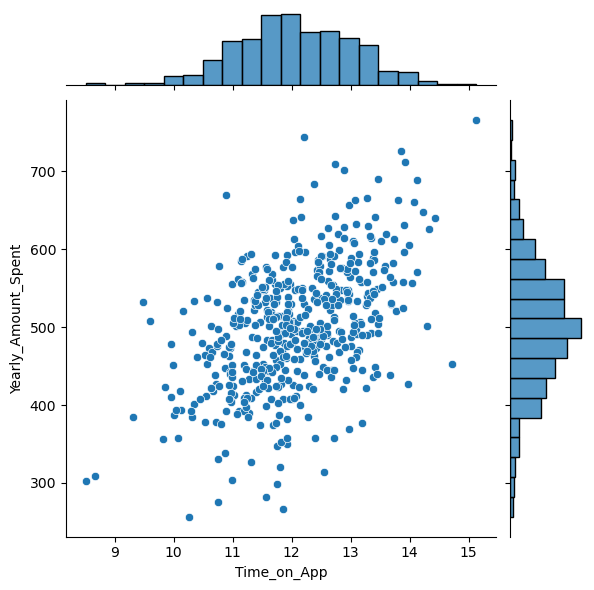

In [14]:
sns.jointplot(data = df, x = "Time_on_App", y = "Yearly_Amount_Spent")
plt.show()

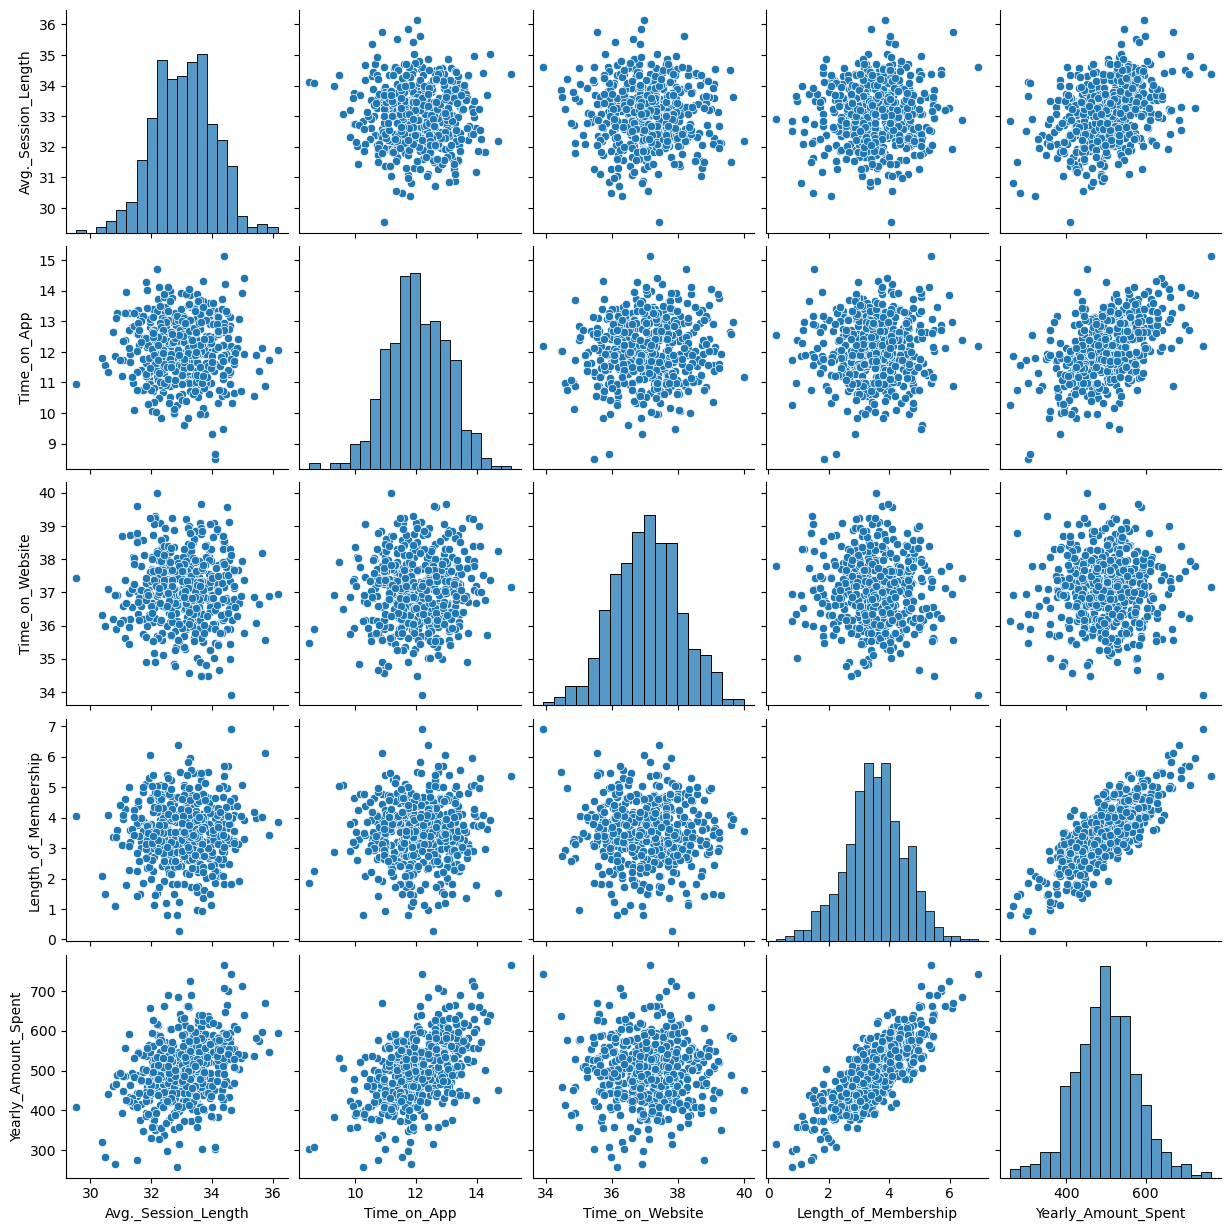

In [15]:
sns.pairplot(df)
plt.show()

As we can see Length of membership and Yearly Amount Spent are more align with each other

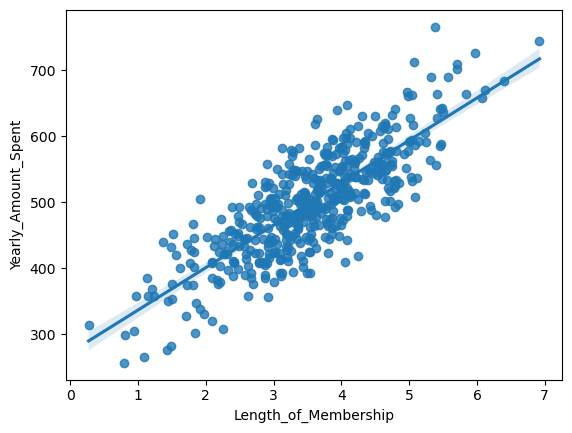

In [17]:
sns.regplot(data = df, x = "Length_of_Membership", y = "Yearly_Amount_Spent")
plt.show()

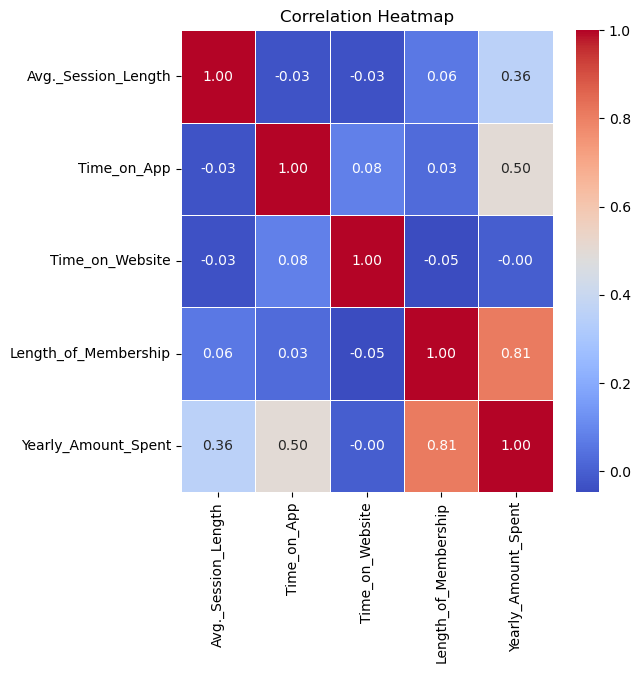

In [23]:
numeric_df = df.select_dtypes(include=['float', 'int'])
cor_matrix = numeric_df.corr()

plt.figure(figsize=(6 , 6))
sns.heatmap(cor_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths= 0.5)

plt.title("Correlation Heatmap")
plt.show()

Time On App has a Positive relation with Yearly Amount Spent while Website has 0 relation and its negative also. We can consider that Optimisation of App will be better option

#### Model Training

In [24]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg._Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [25]:
X = df[["Avg._Session_Length", 'Time_on_App', 'Time_on_Website','Length_of_Membership' ]]

y = df['Yearly_Amount_Spent']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

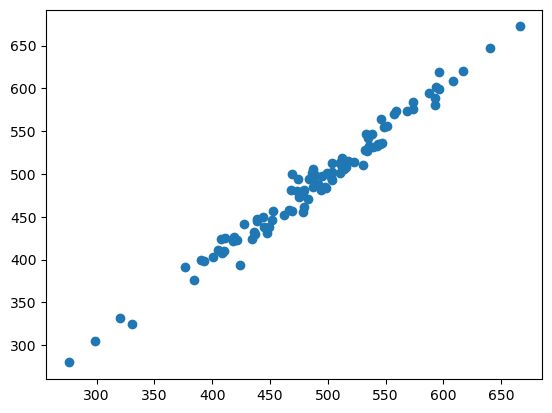

In [29]:
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 8.558441885315233
R2 Score : 0.9778130629184127


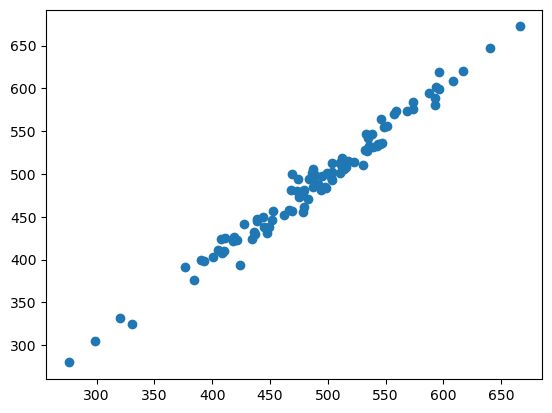

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score : {score}')

plt.scatter(y_test, y_pred)
plt.show()


As we can see MAE is very High 8.46 & R2 score is 0.9807 so we need to check the overfitting

In [32]:
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

print(f"Train R2: {round(train_r2, 4)} , Test R2: {round(test_r2, 4)}")

Train R2: 0.9854 , Test R2: 0.9778


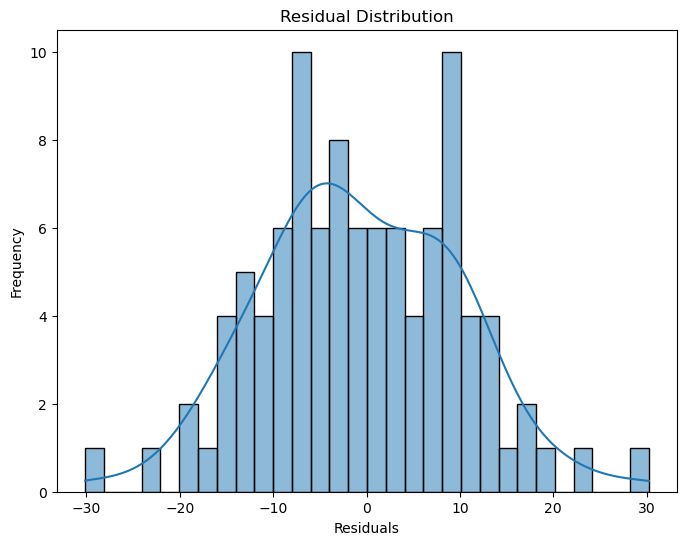

In [33]:
residuals = y_test - y_pred
plt.figure(figsize= (8,6))
sns.histplot(residuals, kde = True, bins = 30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

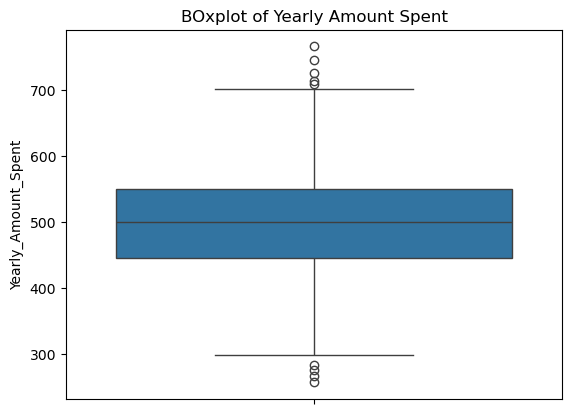

In [34]:
#Outliers Checking
sns.boxplot(y = df['Yearly_Amount_Spent'])
plt.title("BOxplot of Yearly Amount Spent")
plt.show()

In [35]:
Q1 = df['Yearly_Amount_Spent'].quantile(0.25)
Q3 = df['Yearly_Amount_Spent'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Yearly_Amount_Spent'] >= lower_bound) & (df['Yearly_Amount_Spent'] <= upper_bound)]
df_cleaned.shape

(491, 8)

In [42]:
X = df_cleaned[["Avg._Session_Length", 'Time_on_App', 'Time_on_Website','Length_of_Membership' ]]

y = df_cleaned['Yearly_Amount_Spent']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

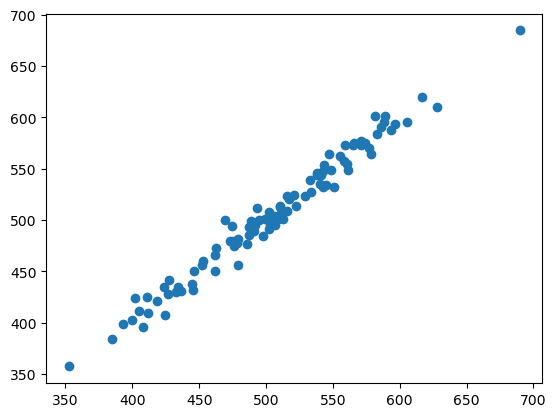

In [48]:
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 7.623950188883033
R2 Score : 0.9759869572792604


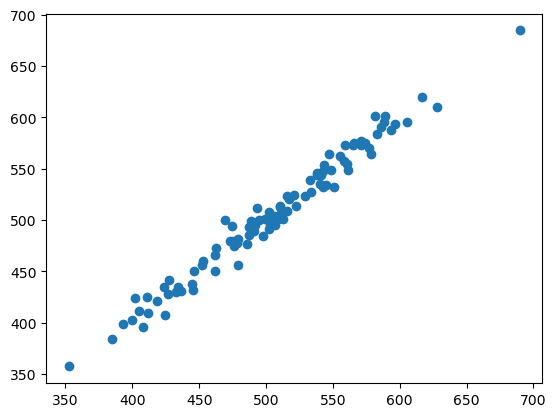

In [49]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score : {score}")

plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error : 7.623950188883033
r2 Score: 0.9759869572792604


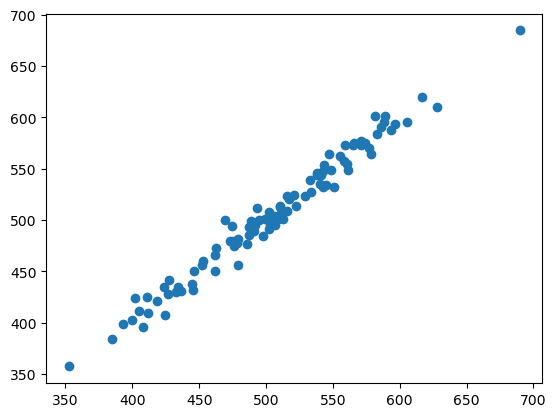

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
yl_predict = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {mae}")
print(f"r2 Score: {score}")

plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error : 7.623950188883033
r2 Score: 0.9759869572792604


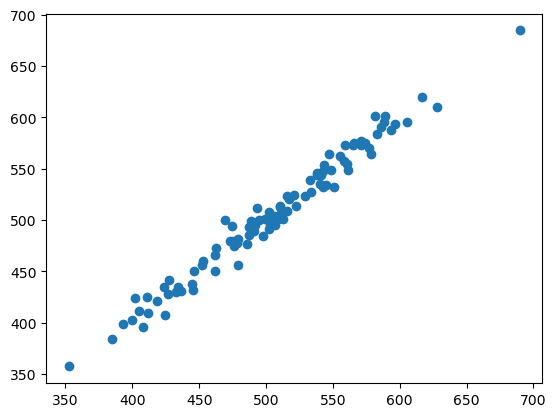

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
yl_predict = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {mae}")
print(f"r2 Score: {score}")

plt.scatter(y_test, y_pred)
plt.show()

In [53]:
coefficients = model.coef_
feature_importance = pd.DataFrame(coefficients, index= X.columns, columns= ['Coefficient'])
feature_importance

,Coefficient
Avg._Session_Length,25.802460
Time_on_App,38.601450
Time_on_Website,0.669361
Length_of_Membership,61.485444


Conclusion:
    Time on App has a strong influence, much more than the website.
This suggests the company should focus more on enhancing the app experience.
Avg. Session Length is important, but not as much as the app and membership duration.
Time on Website has little to no impact, implying website engagement doesn’t translate into spending.

Business Recommendations:

Invest more in the mobile app rather than the website to drive sales.
Encourage long-term membership programs through loyalty rewards, discounts, or exclusive benefits.
Improve session quality (not just duration) to boost spending.

In [57]:
import joblib
joblib.dump(model, 'model_joblib.pkl')

['model_joblib.pkl']

In [56]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
